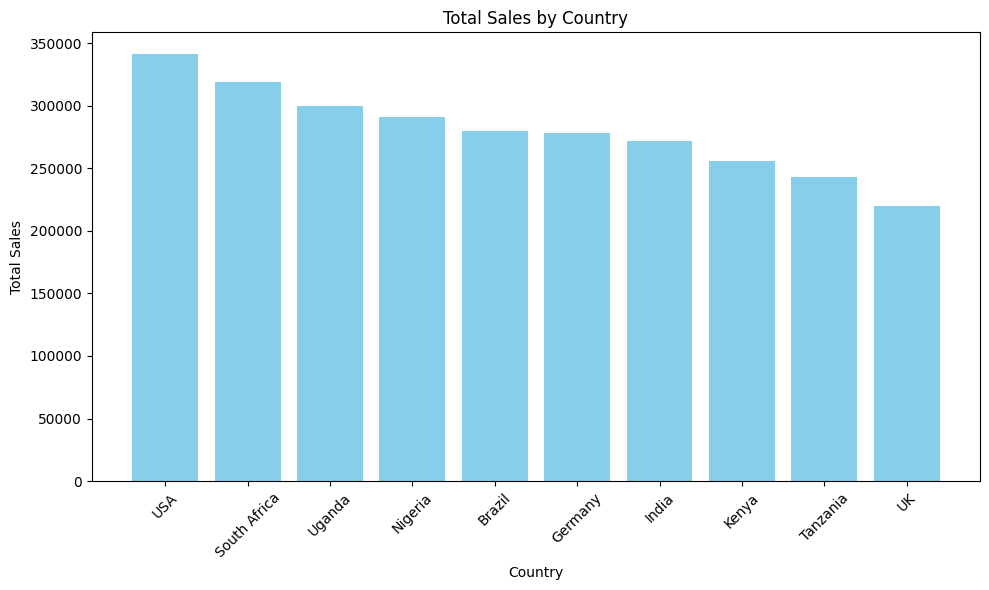

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("retail_dw.db")

# Query: total sales by country
query = """
SELECT 
    c.country,
    SUM(f.total_sales) AS total_sales
FROM SalesFact f
JOIN CustomerDim c ON f.customer_id = c.customer_id
GROUP BY c.country
ORDER BY total_sales DESC;
"""

df = pd.read_sql_query(query, conn)
conn.close()

# Plot
plt.figure(figsize=(10,6))
plt.bar(df['country'], df['total_sales'], color='skyblue')
plt.title("Total Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()

# Save image
plt.savefig("sales_by_country.png")
plt.show()